# STC - source time courses

MNE provides different methods for solving it: dSPM, sLORETA, LCMV, MxNE etc.

In [5]:
from mne import read_source_estimate
from mne.datasets import sample

print(__doc__)

# Paths to example data
sample_dir_raw = sample.data_path()
sample_dir = sample_dir_raw / 'MEG' / 'sample'
subjects_dir = sample_dir_raw / 'subjects'

fname_stc = sample_dir / 'sample_audvis-meg'

Automatically created module for IPython interactive environment


Using notebook 3d backend.



<IPython.core.display.Javascript object>


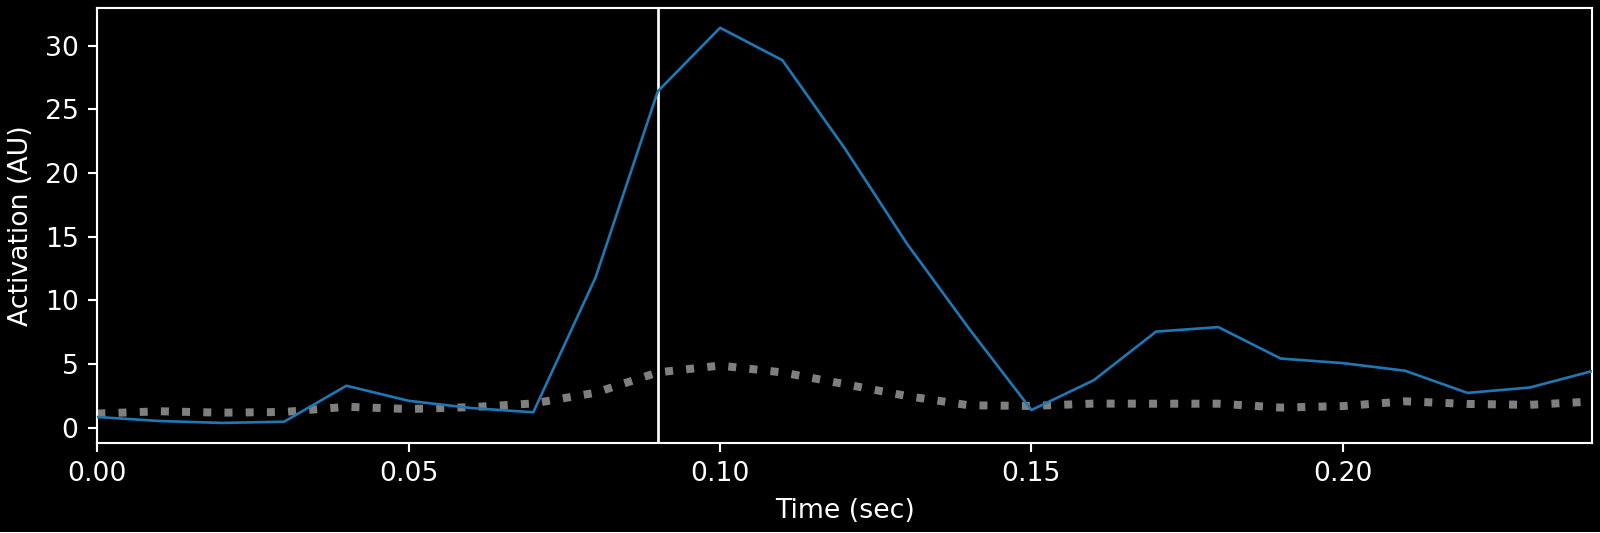

In [6]:
stc = read_source_estimate(fname_stc, subject='sample')

# Define plotting parameters
surfer_kwargs = dict(
    hemi='lh', subjects_dir=subjects_dir,
    clim=dict(kind='value', lims=[8, 12, 15]), views='lateral',
    initial_time=0.09, time_unit='s', size=(800, 800),
    smoothing_steps=5)

# Plot surface
brain = stc.plot(**surfer_kwargs)

# Add title
brain.add_text(0.1, 0.9, 'SourceEstimate', 'title', font_size=16)

In [7]:
# sourceestimate(STC)

shape = stc.data.shape

print('The data has %s vertex locations with %s sample points each.' % shape)

The data has 7498 vertex locations with 25 sample points each.


In [8]:
shape_lh = stc.lh_data.shape

print('The left hemisphere has %s vertex locations with %s sample points each.'
      % shape_lh)

The left hemisphere has 3732 vertex locations with 25 sample points each.


In [9]:
is_equal = stc.lh_data.shape[0] + stc.rh_data.shape[0] == stc.data.shape[0]

print('The number of vertices in stc.lh_data and stc.rh_data do ' +
      ('not ' if not is_equal else '') +
      'sum up to the number of rows in stc.data')

The number of vertices in stc.lh_data and stc.rh_data do sum up to the number of rows in stc.data


In [10]:
# RELATIONSHIP TO SOURCESPACES(SRC)

peak_vertex, peak_time = stc.get_peak(hemi='lh', vert_as_index=True,
                                      time_as_index=True)

In [11]:
peak_vertex_surf = stc.lh_vertno[peak_vertex]

peak_value = stc.lh_data[peak_vertex, peak_time]

<IPython.core.display.Javascript object>


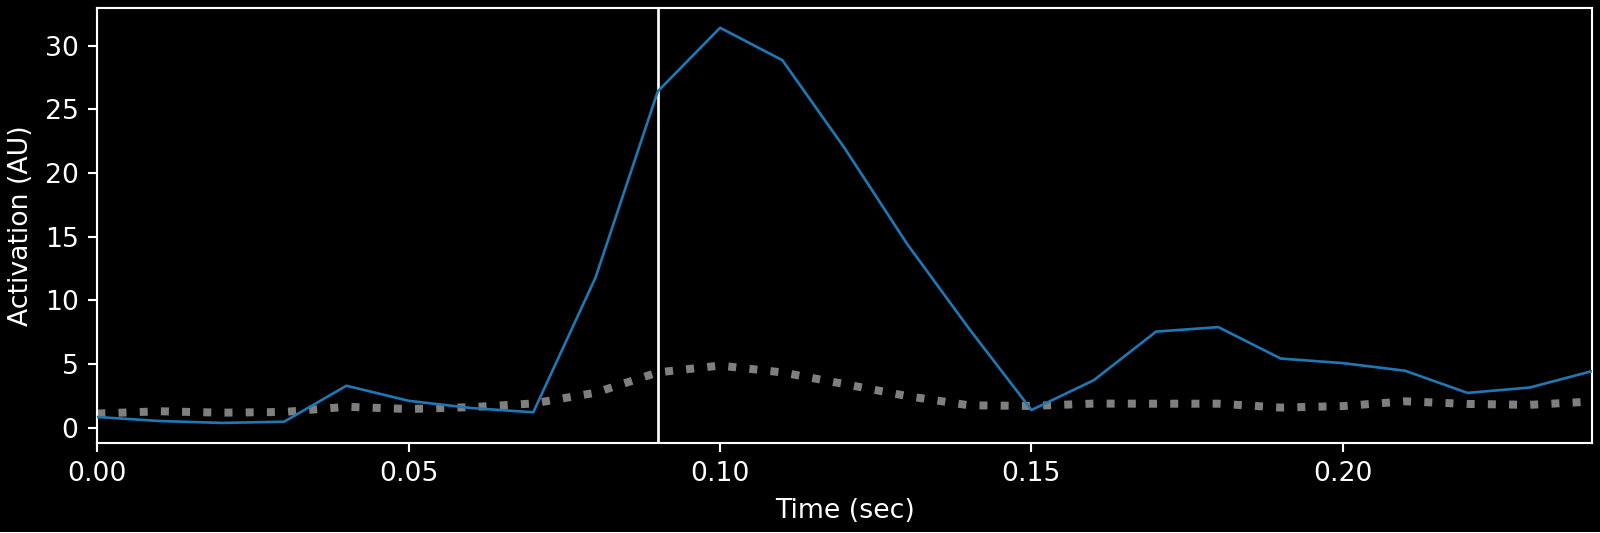

In [12]:
brain = stc.plot(**surfer_kwargs)

# We add the new peak coordinate (as vertex index) as an annotation dot
brain.add_foci(peak_vertex_surf, coords_as_verts=True, hemi='lh', color='blue')

# We add a title as well, stating the amplitude at this time and location
brain.add_text(0.1, 0.9, 'Peak coordinate', 'title', font_size=14)

source location with equivalent current dipole(ECD) fit


In [14]:
pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 23.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import os.path as op
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.forward import make_forward_dipole
from mne.evoked import combine_evoked
from mne.simulation import simulate_evoked

from nilearn.plotting import plot_anat
from nilearn.datasets import load_mni152_template

data_path = mne.datasets.sample.data_path()
subjects_dir = data_path / 'subjects'
fname_ave = data_path / 'MEG' / 'sample' / 'sample_audvis-ave.fif'
fname_cov = data_path / 'MEG' / 'sample' / 'sample_audvis-cov.fif'
fname_bem = subjects_dir / 'sample' / 'bem' / 'sample-5120-bem-sol.fif'
fname_trans = data_path / 'MEG' / 'sample' / 'sample_audvis_raw-trans.fif'
fname_surf_lh = subjects_dir / 'sample' / 'surf' / 'lh.white'

Reading /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
BEM               : PosixPath('/Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-bem-sol.fif')
MRI transform     : /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-trans.fif
Head origin       :   -4.3   18.4   67.0 mm rad =   71.8 mm.
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found   9/168 points outside using solid angles
    Total 201/396 points inside the surface
Interior check completed in 219.4 ms
    195 source space points omitted because they are outside the inner skull surface.
    45 source space points omitted because of the    5.0-mm distance limit.
156 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Go through all guess source locations...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


[done 156 sources]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s fini

---- Fitted :    69.9 ms, distance to inner skull : 10.7185 mm


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    71.6 ms, distance to inner skull : 10.6514 mm


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    73.3 ms, distance to inner skull : 10.5491 mm


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    74.9 ms, distance to inner skull : 10.2397 mm


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


---- Fitted :    76.6 ms, distance to inner skull : 10.0605 mm


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    78.3 ms, distance to inner skull : 9.7598 mm


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

---- Fitted :    79.9 ms, distance to inner skull : 9.4527 mm
Projections have already been applied. Setting proj attribute to True.
7 time points fitted


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

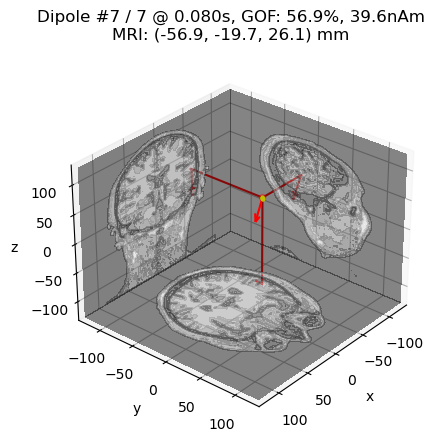

In [17]:
evoked = mne.read_evokeds(fname_ave, condition='Right Auditory',
                          baseline=(None, 0))
evoked.pick_types(meg=True, eeg=False)
evoked_full = evoked.copy()
evoked.crop(0.07, 0.08)

# Fit a dipole
dip = mne.fit_dipole(evoked, fname_cov, fname_bem, fname_trans)[0]

# Plot the result in 3D brain with the MRI image.
dip.plot_locations(fname_trans, 'sample', subjects_dir, mode='orthoview');

Using lh.seghead for head surface.


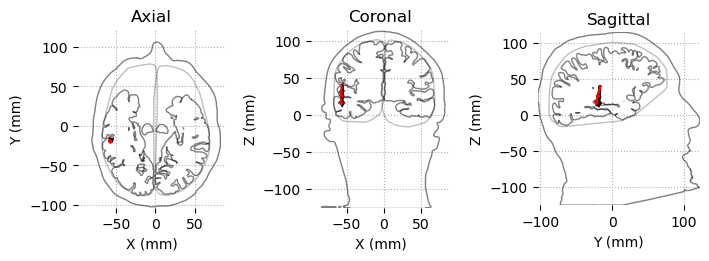

In [18]:
color = ['k'] * len(dip)
color[np.argmax(dip.gof)] = 'r'
dip.plot_locations(fname_trans, 'sample', subjects_dir, mode='outlines',
                   color=color);

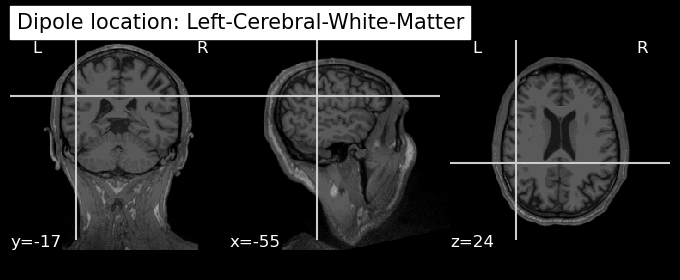

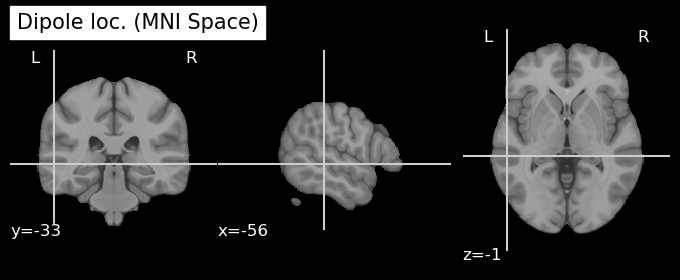

In [19]:
subject = 'sample'
mni_pos = dip.to_mni(subject=subject, trans=fname_trans,
                     subjects_dir=subjects_dir)

mri_pos = dip.to_mri(subject=subject, trans=fname_trans,
                     subjects_dir=subjects_dir)

# Find an anatomical label for the best fitted dipole
best_dip_idx = dip.gof.argmax()
label = dip.to_volume_labels(fname_trans, subject=subject,
                             subjects_dir=subjects_dir,
                             aseg='aparc.a2009s+aseg')[best_dip_idx]

# Draw dipole position on MRI scan and add anatomical label from parcellation
t1_fname = op.join(subjects_dir, subject, 'mri', 'T1.mgz')
fig_T1 = plot_anat(t1_fname, cut_coords=mri_pos[0],
                   title=f'Dipole location: {label}')

try:
    template = load_mni152_template(resolution=1)
except TypeError:  # in nilearn < 0.8.1 this did not exist
    template = load_mni152_template()
fig_template = plot_anat(template, cut_coords=mni_pos[0],
                         title='Dipole loc. (MNI Space)')

Positions (in meters) and orientations
7 sources
Source space          : <SourceSpaces: [<discrete, n_used=7>] head coords, ~3 kB>
MRI -> head transform : /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-trans.fif
Measurement data      : instance of Info
Conductor model   : /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 1 source spaces a total of 7 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812405  0.582954       6.86 mm
     0.034894 -0.583008  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00

Read 305 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm
     0.115790 -0.173570  0.9779

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Computing MEG at 7 source locations (free orientations)...

Finished.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]
Projecting source estimate to sensor space...
[done]
Highest GOF 56.9% at t=79.9 ms with confidence volume 8.1 cm^3


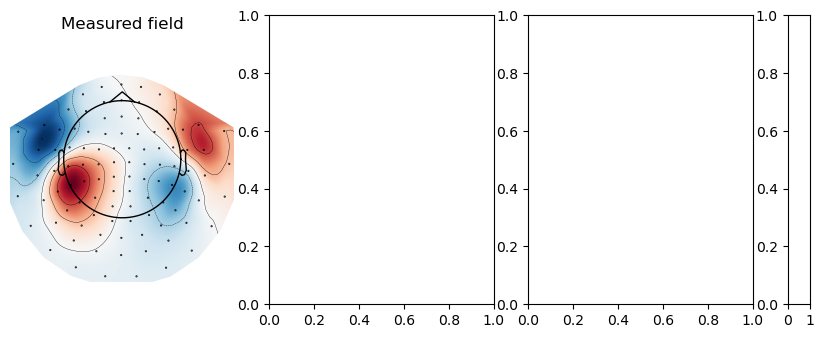

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/var/folders/gy/vmc0g_m96tvb6cdgrbz7478r0000gn/T/ipykernel_4578/2442039807.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [20]:
fwd, stc = make_forward_dipole(dip, fname_bem, evoked.info, fname_trans)
pred_evoked = simulate_evoked(fwd, stc, evoked.info, cov=None, nave=np.inf)

# find time point with highest GOF to plot
best_idx = np.argmax(dip.gof)
best_time = dip.times[best_idx]
print('Highest GOF %0.1f%% at t=%0.1f ms with confidence volume %0.1f cm^3'
      % (dip.gof[best_idx], best_time * 1000,
         dip.conf['vol'][best_idx] * 100 ** 3))
# remember to create a subplot for the colorbar
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[10., 3.4],
                         gridspec_kw=dict(width_ratios=[1, 1, 1, 0.1],
                                          top=0.85))
vmin, vmax = -400, 400  # make sure each plot has same colour range

# first plot the topography at the time of the best fitting (single) dipole
plot_params = dict(times=best_time, ch_type='mag', outlines='head',
                   colorbar=False)
evoked.plot_topomap(time_format='Measured field', axes=axes[0], **plot_params)

# compare this to the predicted field
pred_evoked.plot_topomap(time_format='Predicted field', axes=axes[1],
                         **plot_params)

# Subtract predicted from measured data (apply equal weights)
diff = combine_evoked([evoked, pred_evoked], weights=[1, -1])
plot_params['colorbar'] = True
diff.plot_topomap(time_format='Difference', axes=axes[2:], **plot_params)
fig.suptitle('Comparison of measured and predicted fields '
             'at {:.0f} ms'.format(best_time * 1000.), fontsize=16)
fig.tight_layout()

BEM               : PosixPath('/Users/DanDan/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-bem-sol.fif')
MRI transform     : /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-trans.fif
Head origin       :   -4.3   18.4   67.0 mm rad =   71.8 mm.
Fixed position    :  -61.1    5.4   59.6 mm
Fixed orientation  : 0.0104 -0.7503 -0.6610 mm
Noise covariance  : /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-cov.fif

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812405  0.582954       6.86 mm
     0.034894 -0.583008  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00
Coordinate transformation: MEG device -> head
     0.991420 -0.039936 -0.124467      -6.13 mm
     0.060661  0.984012  0.167456       0.06 mm
     0.115790 -0.173570  0.977991      64.74 mm
     0.000000  0.000000  0.000000       1.00
0 bad channels total
Read 305 MEG channels from info
105 coil de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 421 out of 421 | elapsed:    0.1s finished


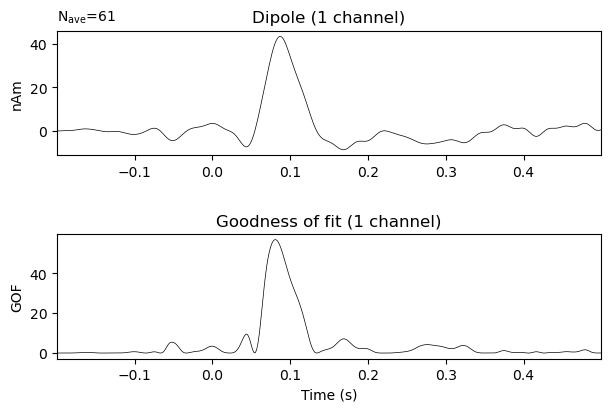

In [21]:
dip_fixed = mne.fit_dipole(evoked_full, fname_cov, fname_bem, fname_trans,
                           pos=dip.pos[best_idx], ori=dip.ori[best_idx])[0]
dip_fixed.plot();

## source localization with MNE, dSPM, sLORETA, eLORETA

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

In [23]:
data_path = sample.data_path()
raw_fname = data_path / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname)  # already has an average reference
events = mne.find_events(raw, stim_channel='STI 014')

event_id = dict(aud_l=1)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)
raw.info['bads'] = ['MEG 2443', 'EEG 053']
baseline = (None, 0)  # means from the first instant to t = 0
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=('meg', 'eog'), baseline=baseline, reject=reject)

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
319 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
4 projection items activated


Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
17 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.8e-09 (2.2e-16 eps * 305 dim * 4.2e+04 

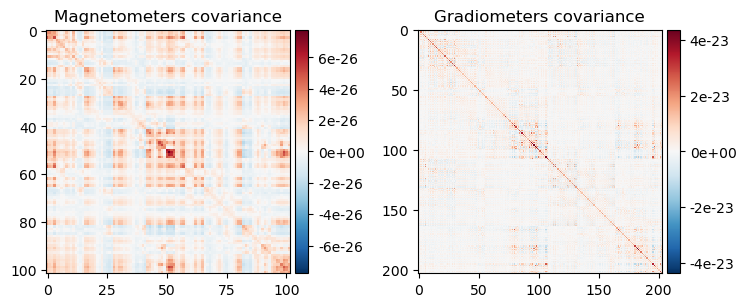

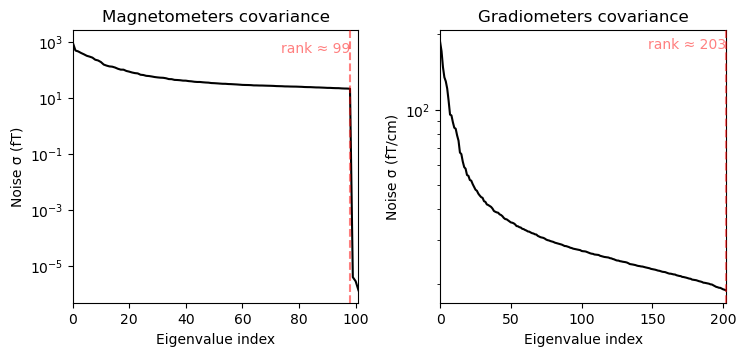

In [24]:
# compute regularized noise covariance

noise_cov = mne.compute_covariance(
    epochs, tmax=0., method=['shrunk', 'empirical'], rank=None, verbose=True)

fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, raw.info)

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


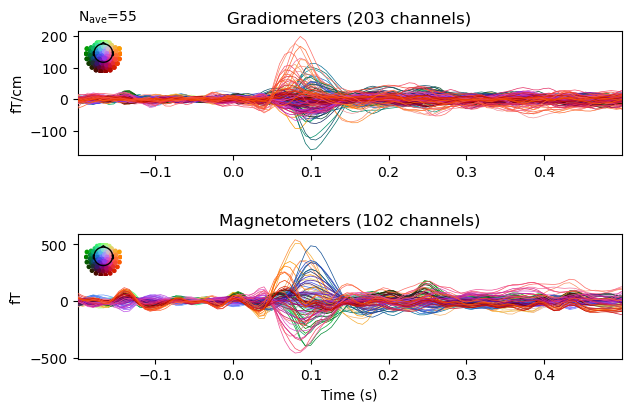

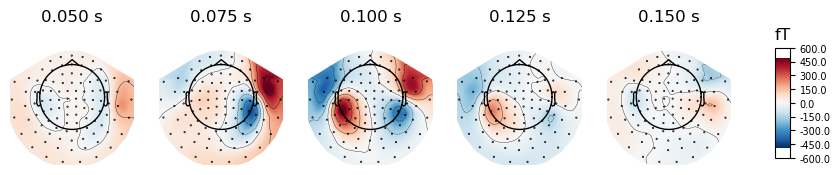

In [26]:
# compute the evoked response
evoked = epochs.average().pick('meg')
evoked.plot(time_unit='s')
evoked.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag');

Computing rank from covariance with rank=None
    Using tolerance 1.6e-13 (2.2e-16 eps * 203 dim * 3.5  max singular value)
    Estimated rank (grad): 203
    GRAD: rank 203 computed from 203 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.2e-14 (2.2e-16 eps * 102 dim * 0.97  max singular value)
    Estimated rank (mag): 99
    MAG: rank 99 computed from 102 data channels with 3 projectors
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank={'grad': 203, 'mag': 99, 'meg': 302}
    Setting small MEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)


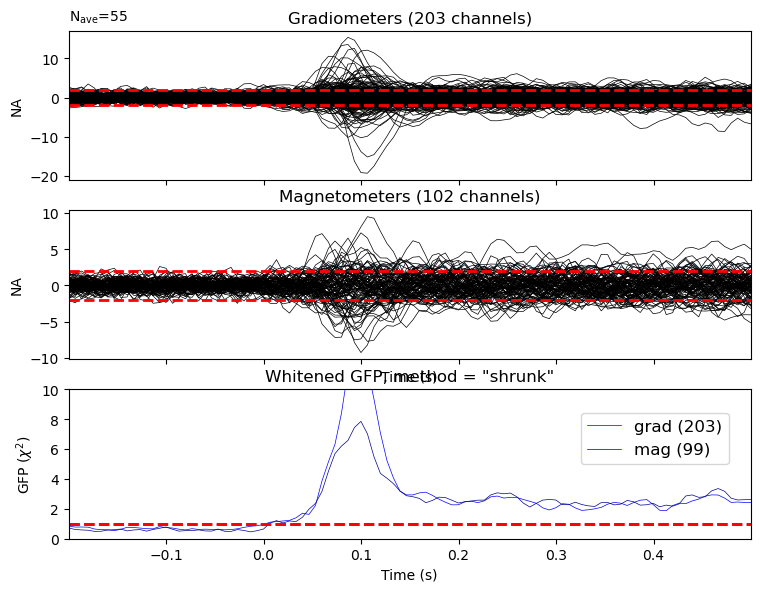

In [27]:
# whitened data
evoked.plot_white(noise_cov, time_unit='s')
del epochs, raw  # to save memory

In [28]:
fname_fwd = data_path / 'MEG' / 'sample' / 'sample_audvis-meg-oct-6-fwd.fif'
fwd = mne.read_forward_solution(fname_fwd)

Reading forward solution from /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [29]:
inverse_operator = make_inverse_operator(
    evoked.info, fwd, noise_cov, loose=0.2, depth=0.8)
del fwd

# You can write it to disk with::
#
#     >>> from mne.minimum_norm import write_inverse_operator
#     >>> write_inverse_operator('sample_audvis-meg-oct-6-inv.fif',
#                                inverse_operator)

Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
info["bads"] and noise_cov["bads"] do not match, excluding bad channels from both
Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Creating the depth weighting matrix...
    203 planar channels
    limit = 7265/7498 = 10.037795
    scale = 2.52065e-08 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank=None
    Using tolerance 2.9e-13 (2.2e-16 eps * 305 dim * 4.3  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source co

In [30]:
# compute the invese solution
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
stc, residual = apply_inverse(evoked, inverse_operator, lambda2,
                              method=method, pick_ori=None,
                              return_residual=True, verbose=True)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "aud_l"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  66.2% variance
    Combining the current components...
    dSPM...
[done]


In [31]:
fig, ax = plt.subplots()
ax.plot(1e3 * stc.times, stc.data[::100, :].T)
ax.set(xlabel='time (ms)', ylabel='%s value' % method)

[Text(0.5, 0, 'time (ms)'), Text(0, 0.5, 'dSPM value')]

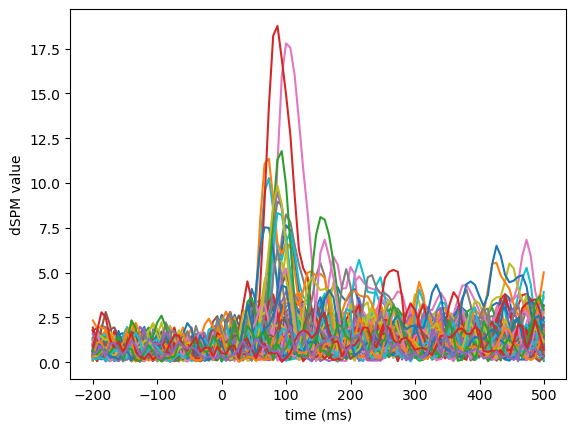

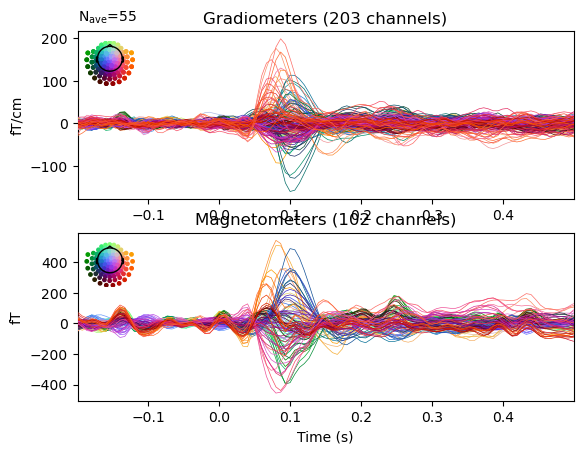

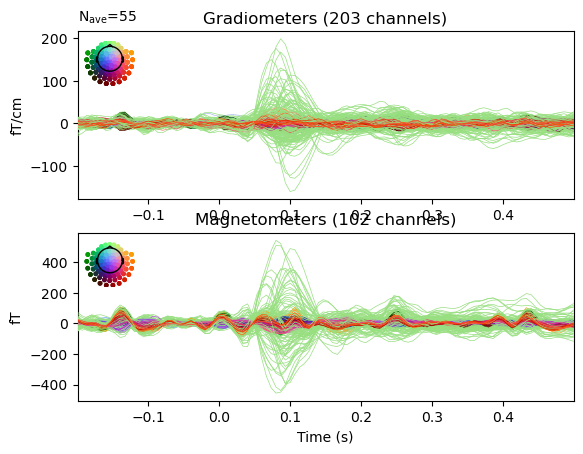

In [32]:
fig, axes = plt.subplots(2, 1)
evoked.plot(axes=axes)
for ax in axes:
    for text in list(ax.texts):
        text.remove()
    for line in ax.lines:
        line.set_color('#98df81')
residual.plot(axes=axes)

<IPython.core.display.Javascript object>


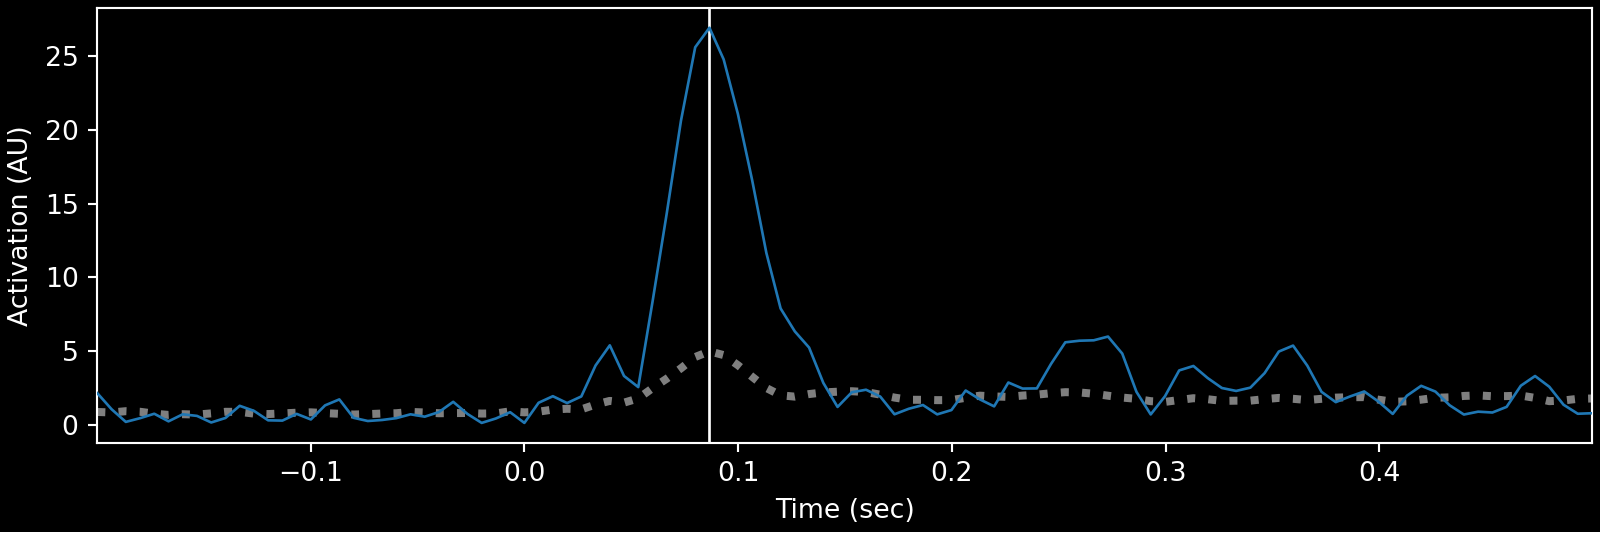

In [33]:
vertno_max, time_max = stc.get_peak(hemi='rh')

subjects_dir = data_path / 'subjects'
surfer_kwargs = dict(
    hemi='rh', subjects_dir=subjects_dir,
    clim=dict(kind='value', lims=[8, 12, 15]), views='lateral',
    initial_time=time_max, time_unit='s', size=(800, 800), smoothing_steps=10)
brain = stc.plot(**surfer_kwargs)
brain.add_foci(vertno_max, coords_as_verts=True, hemi='rh', color='blue',
               scale_factor=0.6, alpha=0.5)
brain.add_text(0.1, 0.9, 'dSPM (plus location of maximal activation)', 'title',
               font_size=14)

# The documentation website's movie is generated with:
# brain.save_movie(..., tmin=0.05, tmax=0.15, interpolation='linear',
#                  time_dilation=20, framerate=10, time_viewer=True)

## dipole orientation in source localization

In [34]:
import mne
import numpy as np
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

data_path = sample.data_path()
meg_path = data_path / 'MEG' / 'sample'
evokeds = mne.read_evokeds(meg_path / 'sample_audvis-ave.fif')
left_auditory = evokeds[0].apply_baseline()
fwd = mne.read_forward_solution(
    meg_path / 'sample_audvis-meg-eeg-oct-6-fwd.fif')
mne.convert_forward_solution(fwd, surf_ori=True, copy=False)
noise_cov = mne.read_cov(meg_path / 'sample_audvis-cov.fif')
subject = 'sample'
subjects_dir = data_path / 'subjects'
trans_fname = meg_path / 'sample_audvis_raw-trans.fif'

Reading /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
 

In [38]:
lh = fwd['src'][0]  # Visualize the left hemisphere
verts = lh['rr']  # The vertices of the source space
tris = lh['tris']  # Groups of three vertices that form triangles
dip_pos = lh['rr'][lh['vertno']]  # The position of the dipoles
dip_ori = lh['nn'][lh['vertno']]
dip_len = len(dip_pos)
dip_times = [0]
white = (1.0, 1.0, 1.0)  # RGB values for a white color

actual_amp = np.ones(dip_len)  # misc amp to create Dipole instance
actual_gof = np.ones(dip_len)  # misc GOF to create Dipole instance
dipoles = mne.Dipole(dip_times, dip_pos, actual_amp, dip_ori, actual_gof)
trans = mne.read_trans(trans_fname)

fig = mne.viz.create_3d_figure(size=(600, 400), bgcolor=white);
coord_frame = 'mri'

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans, surfaces='white',
    coord_frame=coord_frame, fig=fig);

# Mark the position of the dipoles with small red dots
mne.viz.plot_dipole_locations(
    dipoles=dipoles, trans=trans, mode='sphere', subject=subject,
    subjects_dir=subjects_dir, coord_frame=coord_frame, scale=7e-4, fig=fig);

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25);

In [39]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the dipoles as arrows pointing along the surface normal
mne.viz.plot_dipole_locations(
    dipoles=dipoles, trans=trans, mode='arrow', subject=subject,
    subjects_dir=subjects_dir, coord_frame='head', scale=7e-4, fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.1)

Computing inverse operator with 364 channels.
    364 out of 366 channels remain after picking
Selected 364 channels
Creating the depth weighting matrix...
    203 planar channels
    limit = 7262/7498 = 10.020865
    scale = 2.58122e-08 exp = 0.8
    Picked elements from a free-orientation depth-weighting prior into the fixed-orientation one
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 4)
Computing rank from covariance with rank=None
    Using tolerance 3.3e-13 (2.2e-16 eps * 305 dim * 4.8  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Using tolerance 4.7e-14 (2.2e-16 eps * 59 dim * 3.6  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
    Sett

<IPython.core.display.Javascript object>


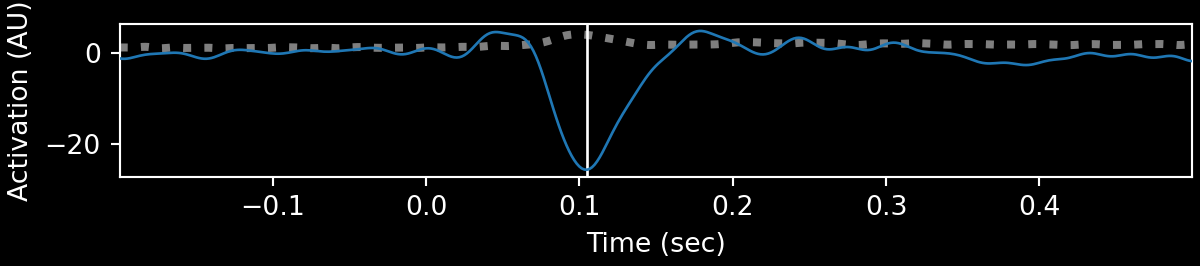

In [40]:
# Compute the source estimate for the left auditory condition in the sample
# dataset.
inv = make_inverse_operator(left_auditory.info, fwd, noise_cov, fixed=True)
stc = apply_inverse(left_auditory, inv, pick_ori=None)

# Visualize it at the moment of peak activity.
_, time_max = stc.get_peak(hemi='lh')
brain_fixed = stc.plot(surface='white', subjects_dir=subjects_dir,
                       initial_time=time_max, time_unit='s', size=(600, 400))
mne.viz.set_3d_view(figure=brain_fixed, focalpoint=(0., 0., 50))

In [41]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the three dipoles defined at each location in the source space
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans, fwd=fwd,
    surfaces='white', coord_frame='head', fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.1)

Computing inverse operator with 364 channels.
    364 out of 366 channels remain after picking
Selected 364 channels
Creating the depth weighting matrix...
    203 planar channels
    limit = 7262/7498 = 10.020865
    scale = 2.58122e-08 exp = 0.8
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 4)
Computing rank from covariance with rank=None
    Using tolerance 3.3e-13 (2.2e-16 eps * 305 dim * 4.8  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Using tolerance 4.7e-14 (2.2e-16 eps * 59 dim * 3.6  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
    Setting small MEG eigenvalues to zero (without PCA)
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular va

<IPython.core.display.Javascript object>


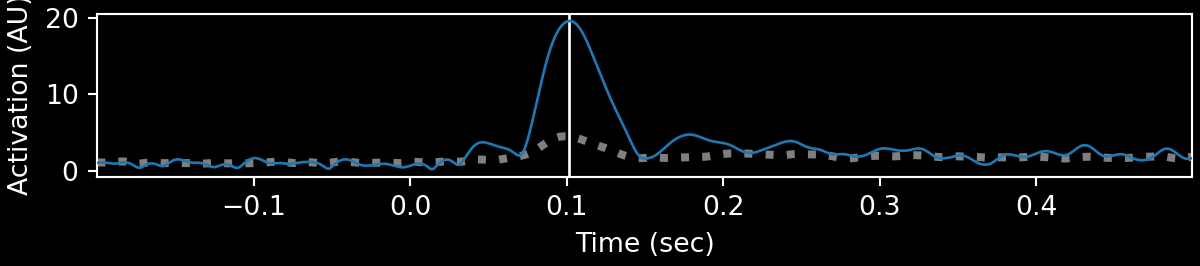

In [42]:
# Make an inverse operator with loose dipole orientations
inv = make_inverse_operator(left_auditory.info, fwd, noise_cov, fixed=False,
                            loose=1.0)

# Compute the source estimate, indicate that we want a vector solution
stc = apply_inverse(left_auditory, inv, pick_ori='vector')

# Visualize it at the moment of peak activity.
_, time_max = stc.magnitude().get_peak(hemi='lh')
brain_mag = stc.plot(subjects_dir=subjects_dir, initial_time=time_max,
                     time_unit='s', size=(600, 400), overlay_alpha=0)
mne.viz.set_3d_view(figure=brain_mag, focalpoint=(0., 0., 50))

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 4)
    Created the whitener using a noise covariance matrix with rank 360 (4 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "Left Auditory"...
    Picked 364 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  64.8% variance
    Combining the current components...
    dSPM...
[done]
Using control points [ 3.79973942  4.38378769 13.8347911 ]


<IPython.core.display.Javascript object>


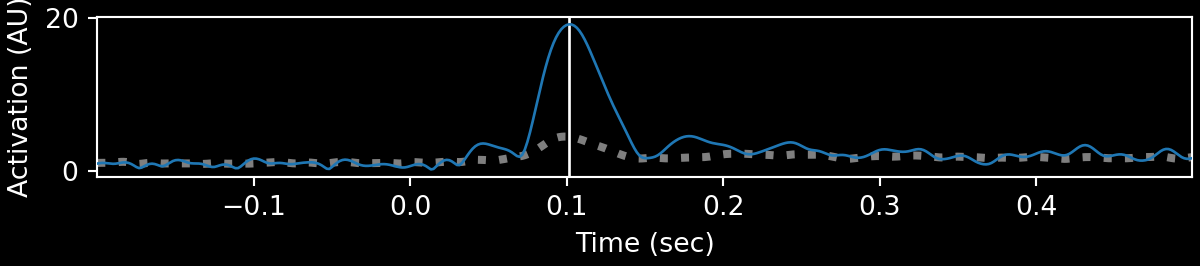

In [43]:
# Only retain vector magnitudes
stc = apply_inverse(left_auditory, inv, pick_ori=None)

# Visualize it at the moment of peak activity
_, time_max = stc.get_peak(hemi='lh')
brain = stc.plot(surface='white', subjects_dir=subjects_dir,
                 initial_time=time_max, time_unit='s', size=(600, 400))
mne.viz.set_3d_view(figure=brain, focalpoint=(0., 0., 50))

This example shows example fixed- and free-orientation source localizations produced by the minimum-norm variants implemented in MNE-Python: MNE, dSPM, sLORETA, and eLORETA.

In [44]:
import mne
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

print(__doc__)

data_path = sample.data_path()
subjects_dir = data_path / 'subjects'

# Read data (just MEG here for speed, though we could use MEG+EEG)
meg_path = data_path / 'MEG' / 'sample'
fname_evoked = meg_path / 'sample_audvis-ave.fif'
evoked = mne.read_evokeds(fname_evoked, condition='Right Auditory',
                          baseline=(None, 0))
fname_fwd = meg_path / 'sample_audvis-meg-oct-6-fwd.fif'
fname_cov = meg_path / 'sample_audvis-cov.fif'
fwd = mne.read_forward_solution(fname_fwd)
cov = mne.read_cov(fname_cov)
# crop for speed in these examples
evoked.crop(0.05, 0.15)

Automatically created module for IPython interactive environment
Reading /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
Reading forward solution from /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added..

<Evoked | 'Right Auditory' (average, N=61), 0.049949 – 0.14985 sec, baseline -0.199795 – 0 sec (baseline period was cropped after baseline correction), 376 ch, ~3.4 MB>

In [45]:
# fixed orientation
inv = make_inverse_operator(evoked.info, fwd, cov, loose=0., depth=0.8,
                            verbose=True)

Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Creating the depth weighting matrix...
    203 planar channels
    limit = 7265/7498 = 10.037797
    scale = 2.52065e-08 exp = 0.8
    Picked elements from a free-orientation depth-weighting prior into the fixed-orientation one
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank=None
    Using tolerance 3.3e-13 (2.2e-16 eps * 305 dim * 4.8  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  78.4% variance
[done]
Using control points [1.28047949e-10 1.72734061e-10 2.97200565e-10]


<IPython.core.display.Javascript object>


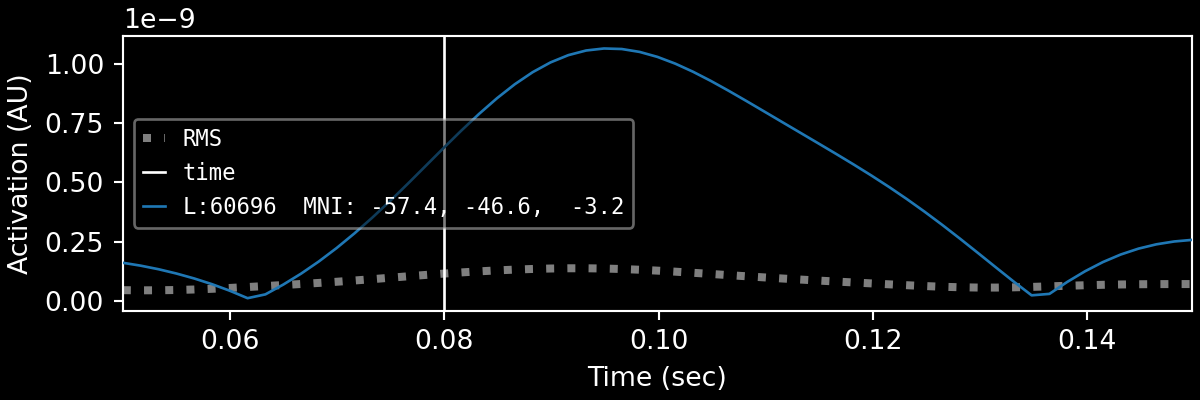

In [46]:
snr = 3.0
lambda2 = 1.0 / snr ** 2
kwargs = dict(initial_time=0.08, hemi='lh', subjects_dir=subjects_dir,
              size=(600, 600), clim=dict(kind='percent', lims=[90, 95, 99]),
              smoothing_steps=7)

stc = abs(apply_inverse(evoked, inv, lambda2, 'MNE', verbose=True))
brain = stc.plot(figure=1, **kwargs)
brain.add_text(0.1, 0.9, 'MNE', 'title', font_size=14)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  78.4% variance
    dSPM...
[done]
Using control points [ 4.56295843  6.27742998 12.00597191]


<IPython.core.display.Javascript object>


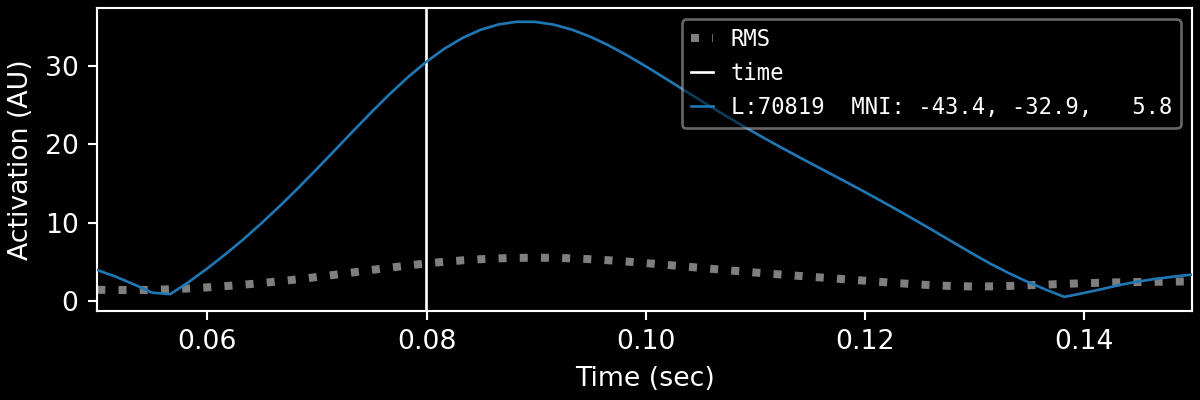

In [47]:
# default noise normalization, dSPM:

stc = abs(apply_inverse(evoked, inv, lambda2, 'dSPM', verbose=True))
brain = stc.plot(figure=2, **kwargs)
brain.add_text(0.1, 0.9, 'dSPM', 'title', font_size=14)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (sLORETA)...
[done]
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  78.4% variance
    sLORETA...
[done]
Using control points [1.65359441 2.22223215 3.63030546]


<IPython.core.display.Javascript object>


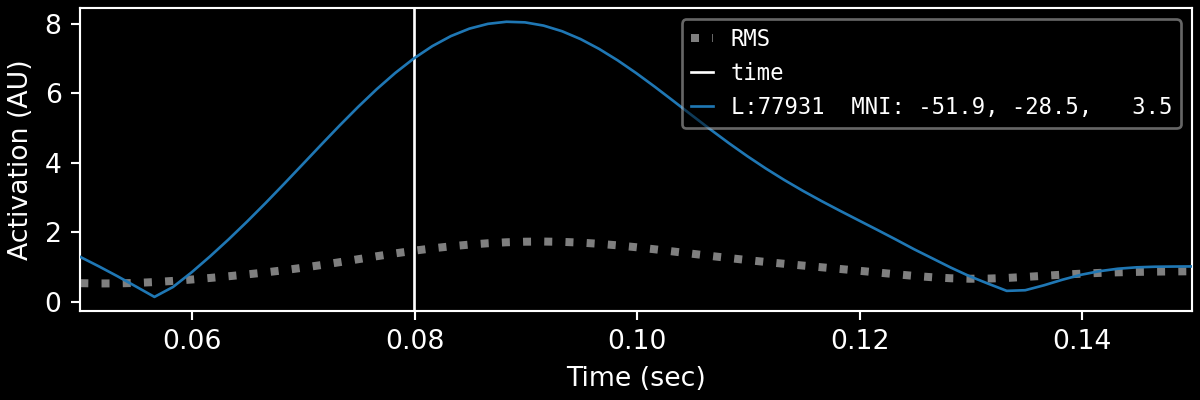

In [48]:
# sLoreta


stc = abs(apply_inverse(evoked, inv, lambda2, 'sLORETA', verbose=True))
brain = stc.plot(figure=3, **kwargs)
brain.add_text(0.1, 0.9, 'sLORETA', 'title', font_size=14)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing optimized source covariance (eLORETA)...
        Fitting up to 20 iterations...
        Converged on iteration 11 (7.1e-07 < 1e-06)
        Updating inverse with weighted eigen leads
[done]
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads already weighted ... 
    Computing residual...
    Explained  78.0% variance
[done]
Using control points [1.34003429e-10 1.79067976e-10 2.93243713e-10]


<IPython.core.display.Javascript object>


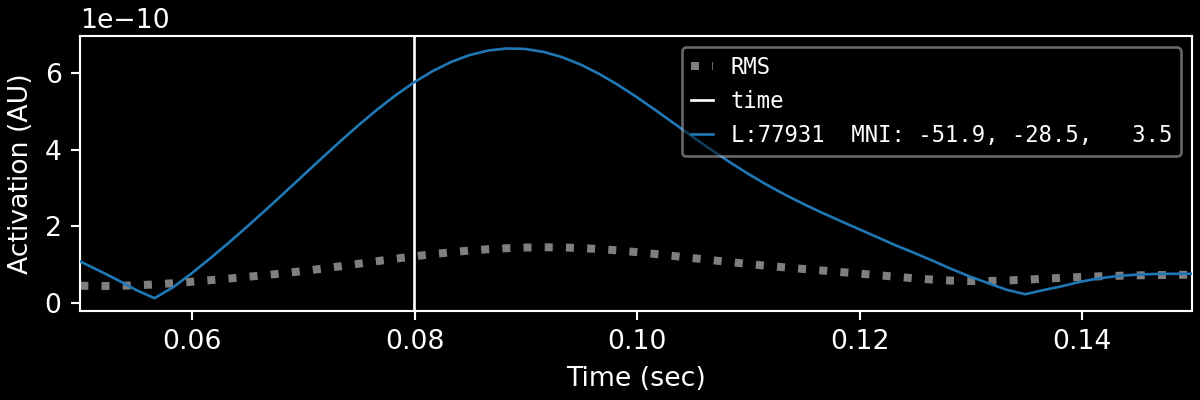

In [49]:
# eLORETA

stc = abs(apply_inverse(evoked, inv, lambda2, 'eLORETA', verbose=True))
brain = stc.plot(figure=4, **kwargs)
brain.add_text(0.1, 0.9, 'eLORETA', 'title', font_size=14)
del inv

In [50]:
# FREE ORIENTATION

inv = make_inverse_operator(evoked.info, fwd, cov, loose=1., depth=0.8,
                            verbose=True)
del fwd

Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Creating the depth weighting matrix...
    203 planar channels
    limit = 7265/7498 = 10.037797
    scale = 2.52065e-08 exp = 0.8
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank=None
    Using tolerance 3.3e-13 (2.2e-16 eps * 305 dim * 4.8  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 4.61893
    scaling factor to adjust the trace = 1.8713e+19 (nchan = 305 nzero = 3)


Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  78.5% variance
    Combining the current components...
[done]
Using control points [7.81398589e-11 1.00293217e-10 1.59049572e-10]


<IPython.core.display.Javascript object>


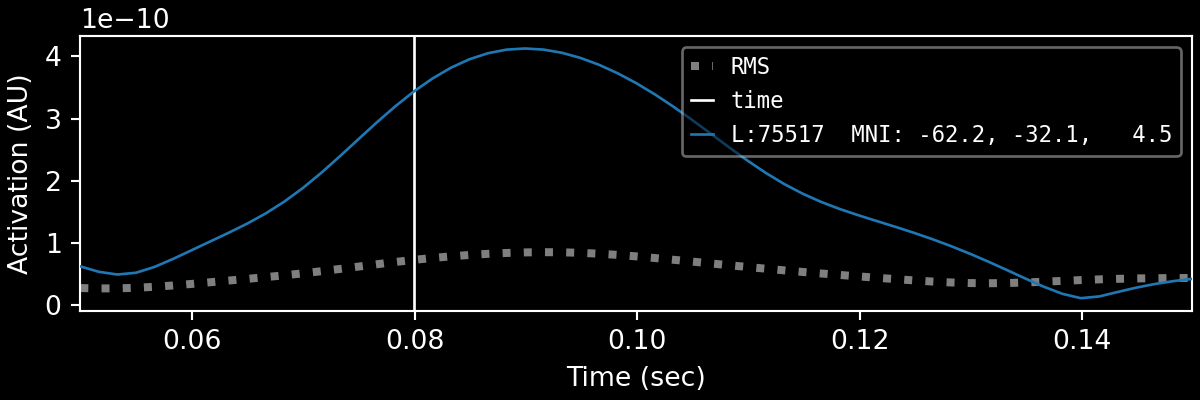

In [51]:
# using MNE

stc = apply_inverse(evoked, inv, lambda2, 'MNE', verbose=True)
brain = stc.plot(figure=5, **kwargs)
brain.add_text(0.1, 0.9, 'MNE', 'title', font_size=14)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  78.5% variance
    Combining the current components...
    dSPM...
[done]
Using control points [ 4.79225614  6.45181117 11.88420763]


<IPython.core.display.Javascript object>


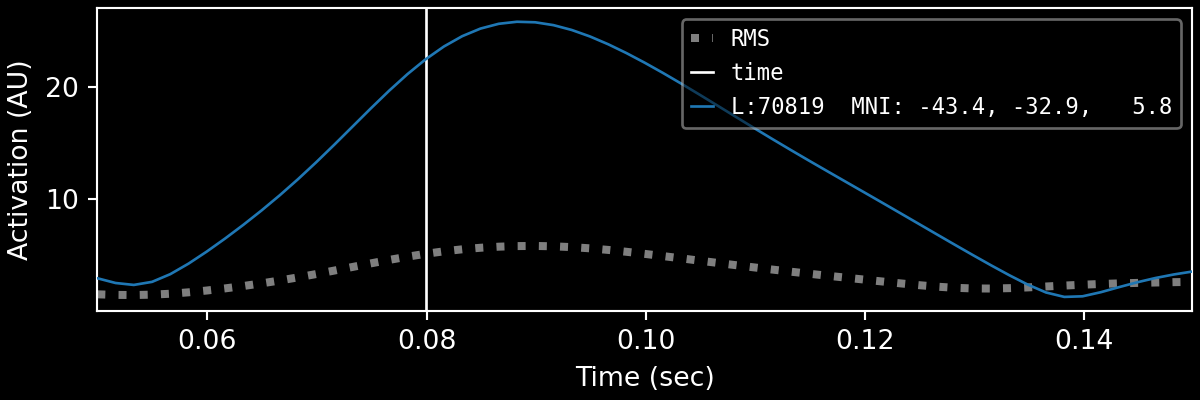

In [52]:
# dSPM

stc = apply_inverse(evoked, inv, lambda2, 'dSPM', verbose=True)
brain = stc.plot(figure=6, **kwargs)
brain.add_text(0.1, 0.9, 'dSPM', 'title', font_size=14)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (sLORETA)...
[done]
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  78.5% variance
    Combining the current components...
    sLORETA...
[done]
Using control points [1.65906465 2.114468   3.42240231]


<IPython.core.display.Javascript object>


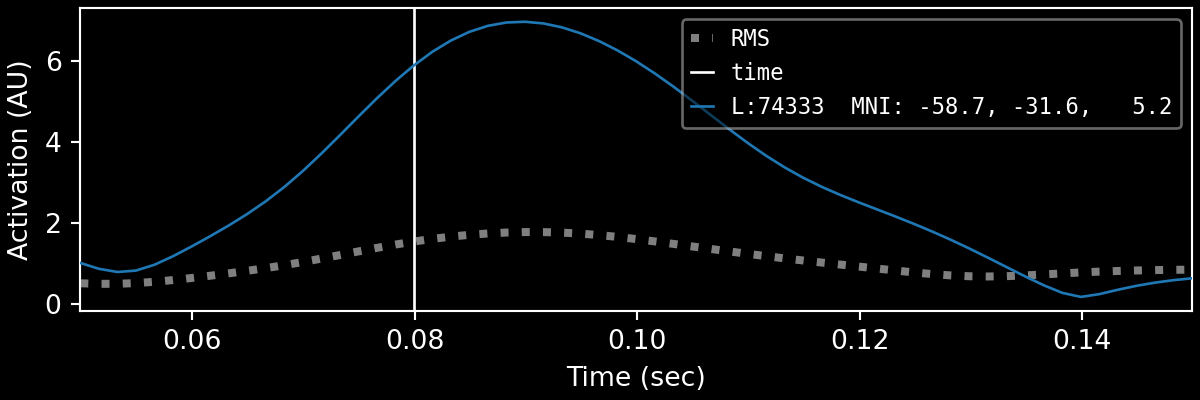

In [53]:
# sLORETA

stc = apply_inverse(evoked, inv, lambda2, 'sLORETA', verbose=True)
brain = stc.plot(figure=7, **kwargs)
brain.add_text(0.1, 0.9, 'sLORETA', 'title', font_size=14)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 61
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing optimized source covariance (eLORETA)...
        Using independent orientation weights
        Fitting up to 20 iterations (this make take a while)...
        Converged on iteration 7 (6.7e-05 < 0.0001)
        Updating inverse with weighted eigen leads
[done]
Applying inverse operator to "Right Auditory"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads already weighted ... 
    Computing residual...
    Explained  78.2% variance
    Combining the current components...
[done]
Using control points [9.41240750e-11 1.15338772e-10 1.80101709e-10]


<IPython.core.display.Javascript object>


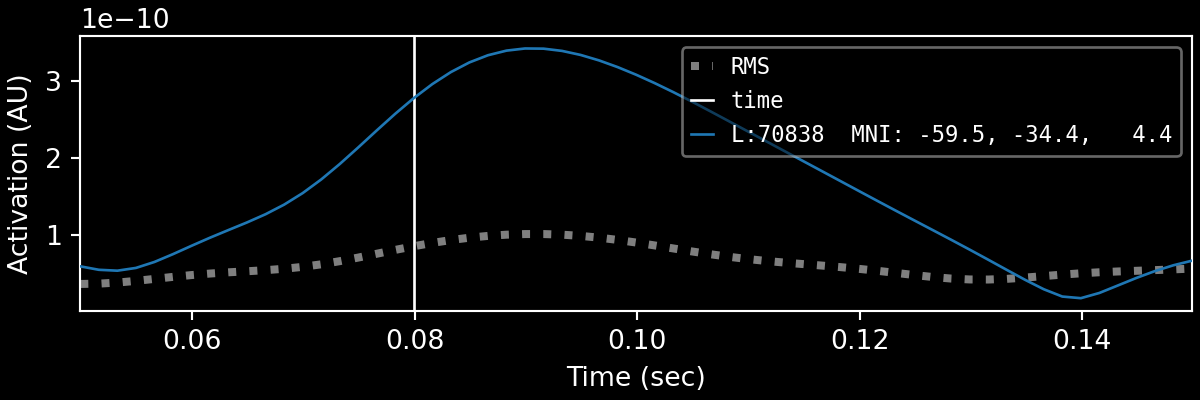

In [54]:
# eloreta
stc = apply_inverse(evoked, inv, lambda2, 'eLORETA', verbose=True,
                    method_params=dict(eps=1e-4))  # larger eps just for speed
brain = stc.plot(figure=8, **kwargs)
brain.add_text(0.1, 0.9, 'eLORETA', 'title', font_size=14)

source reconstruction using an LCMV beamformer

In [55]:
import matplotlib.pyplot as plt
import mne
from mne.datasets import sample, fetch_fsaverage
from mne.beamformer import make_lcmv, apply_lcmv

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
319 events found
Event IDs: [ 1  2  3  4  5 32]
Removing projector <Projection | Average EEG reference, active : False, n_channels : 60>
Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting 

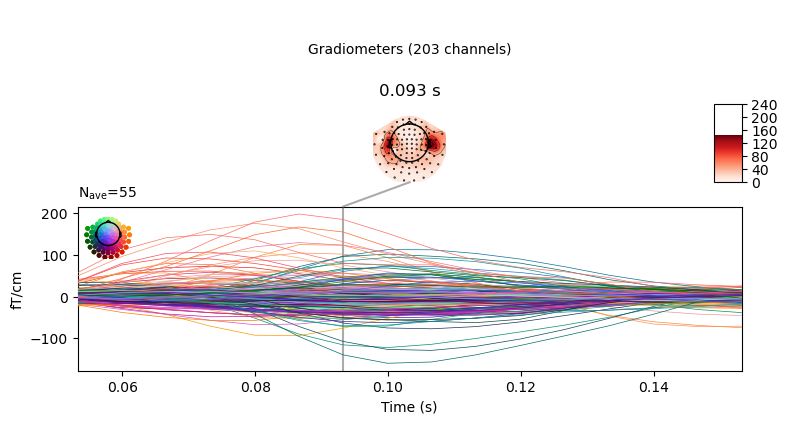

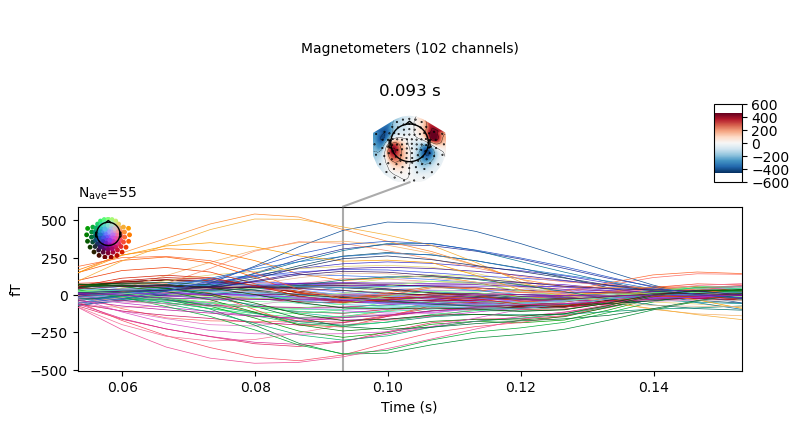

In [56]:
data_path = sample.data_path()
subjects_dir = data_path / 'subjects'
meg_path = data_path / 'MEG' / 'sample'
raw_fname = meg_path / 'sample_audvis_filt-0-40_raw.fif'

# Read the raw data
raw = mne.io.read_raw_fif(raw_fname)
raw.info['bads'] = ['MEG 2443']  # bad MEG channel

# Set up the epoching
event_id = 1  # those are the trials with left-ear auditory stimuli
tmin, tmax = -0.2, 0.5
events = mne.find_events(raw)

# pick relevant channels
raw.pick(['meg', 'eog'])  # pick channels of interest

# Create epochs
proj = False  # already applied
epochs = mne.Epochs(raw, events, event_id, tmin, tmax,
                    baseline=(None, 0), preload=True, proj=proj,
                    reject=dict(grad=4000e-13, mag=4e-12, eog=150e-6))

# for speed purposes, cut to a window of interest
evoked = epochs.average().crop(0.05, 0.15)

# Visualize averaged sensor space data
evoked.plot_joint()

del raw  # save memory

Computing rank from data with rank=None
    Using tolerance 4.1e-09 (2.2e-16 eps * 305 dim * 6.1e+04  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Created an SSP operator (subspace dimension = 3)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 305 -> 302
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2035
[done]
Computing rank from data with rank=None
    Using tolerance 2.8e-09 (2.2e-16 eps * 305 dim * 4.2e+04  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Created an SSP operator (subspace dimension = 3)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 305 -> 302
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 1705
[done]
Computing rank from covariance with rank=None
    Using tolerance 4e-14 (2.2e-16 eps * 102 dim *

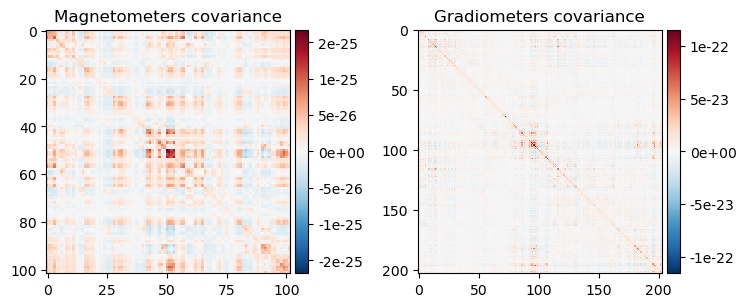

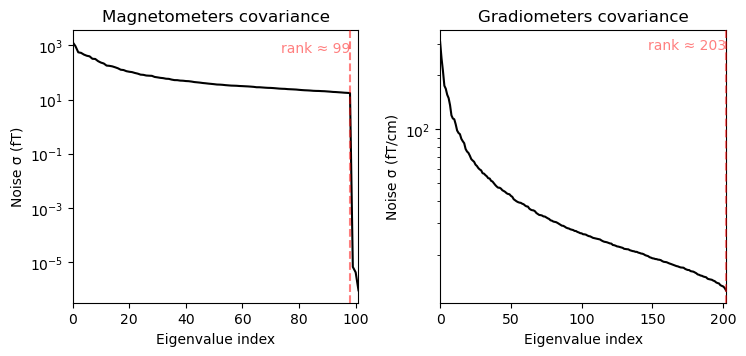

In [57]:
data_cov = mne.compute_covariance(epochs, tmin=0.01, tmax=0.25,
                                  method='empirical')
noise_cov = mne.compute_covariance(epochs, tmin=tmin, tmax=0,
                                   method='empirical')
data_cov.plot(epochs.info)
del epochs

In [64]:
# Read forward model

fwd_fname = meg_path / 'sample_audvis-meg-vol-7-fwd.fif'
forward = mne.read_forward_solution(fwd_fname)

Reading forward solution from /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-vol-7-fwd.fif...
    Reading a source space...
    [done]
    1 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (3757 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [65]:
# construct spatial filter
# 标量滤波器
filters = make_lcmv(evoked.info, forward, data_cov, reg=0.05,
                    noise_cov=noise_cov, pick_ori='max-power',
                    weight_norm='unit-noise-gain', rank=None)

# You can save the filter for later use with:
# filters.save('filters-lcmv.h5')

Computing rank from covariance with rank=None
    Using tolerance 7.1e-13 (2.2e-16 eps * 305 dim * 10  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.9e-13 (2.2e-16 eps * 305 dim * 4.3  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Making LCMV beamformer with rank {'meg': 302}
Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank={'meg': 302}
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 3757 sources
Filter computation complete


In [66]:
#矢量滤波器
filters_vec = make_lcmv(evoked.info, forward, data_cov, reg=0.05,
                        noise_cov=noise_cov, pick_ori='vector',
                        weight_norm='unit-noise-gain', rank=None)
# save a bit of memory
src = forward['src']
del forward 

Computing rank from covariance with rank=None
    Using tolerance 7.1e-13 (2.2e-16 eps * 305 dim * 10  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.9e-13 (2.2e-16 eps * 305 dim * 4.3  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
Making LCMV beamformer with rank {'meg': 302}
Computing inverse operator with 305 channels.
    305 out of 306 channels remain after picking
Selected 305 channels
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank={'meg': 302}
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 3757 sources
Filter computation complete


apply the spatial filter

In [67]:
stc = apply_lcmv(evoked, filters)
stc_vec = apply_lcmv(evoked, filters_vec)
# del filters, filters_vec

In [68]:
lims = [0.3, 0.45, 0.6]
kwargs = dict(src=src, subject='sample', subjects_dir=subjects_dir,
              initial_time=0.087, verbose=True)

In [ ]:
# on MRI slices(orthoview, 2d)

Fixing initial time: 0.087 sec
Showing: t = 0.087 s, (50.7, 2.0, -13.3) mm, [18, 12, 9] vox, 5184 vertex


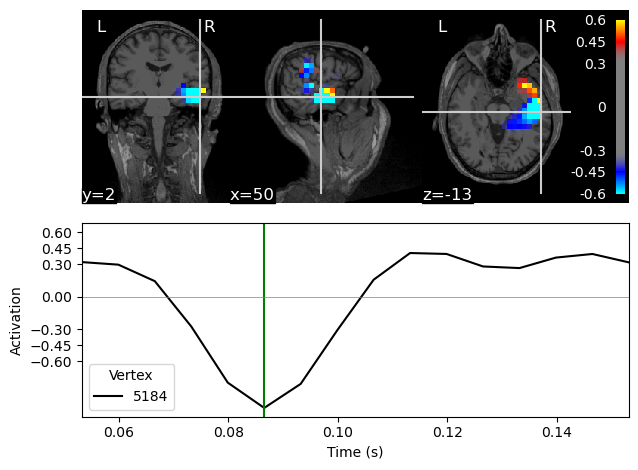

In [70]:
stc.plot(mode='stat_map', clim=dict(kind='value', pos_lims=lims), **kwargs);

Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.022485 -0.008449 -0.036217       5.60 mm
     0.071071  0.914866  0.406098     -19.82 mm
     0.008756 -0.433700  1.028119      -1.55 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.087 sec
Showing: t = 0.087 s, (57.9, -19.7, -15.6) mm, [18, 12, 9] vox, 5184 vertex


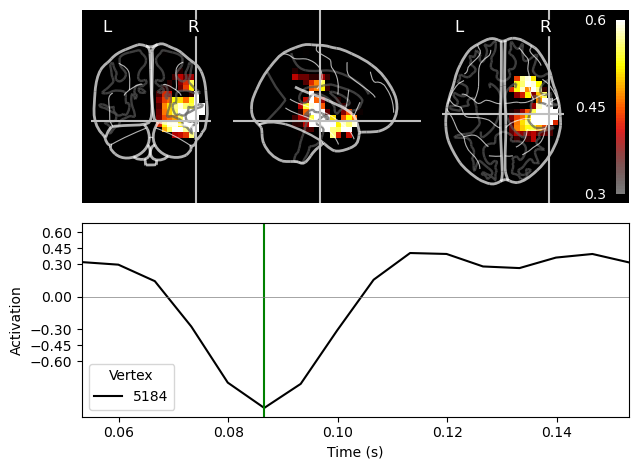

In [72]:
# on MNI glass brain(orthoview 2d

stc.plot(mode='glass_brain', clim=dict(kind='value', lims=lims), **kwargs);

<IPython.core.display.Javascript object>


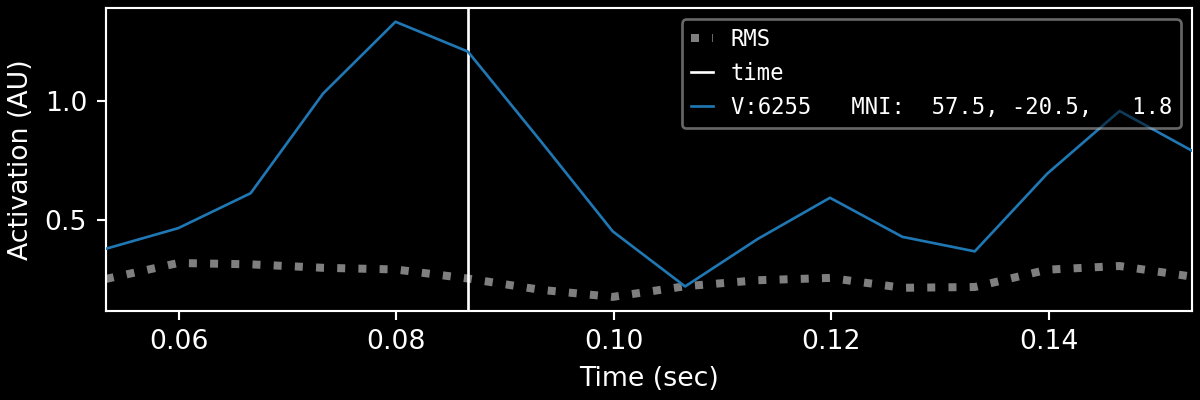

In [73]:
# volumetric rendering (3D) with vectors

brain = stc_vec.plot_3d(
    clim=dict(kind='value', lims=lims), hemi='both', size=(600, 600),
    views=['sagittal'],
    # Could do this for a 3-panel figure:
    # view_layout='horizontal', views=['coronal', 'sagittal', 'axial'],
    brain_kwargs=dict(silhouette=True),
    **kwargs)

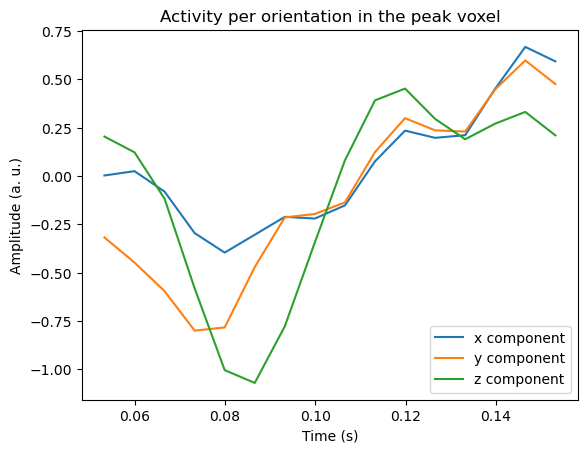

In [74]:
# viz activity of maximum voxel with three components

peak_vox, _ = stc_vec.get_peak(tmin=0.08, tmax=0.1, vert_as_index=True)

ori_labels = ['x', 'y', 'z']
fig, ax = plt.subplots(1)
for ori, label in zip(stc_vec.data[peak_vox, :, :], ori_labels):
    ax.plot(stc_vec.times, ori, label='%s component' % label)
ax.legend(loc='lower right')
ax.set(title='Activity per orientation in the peak voxel', xlabel='Time (s)',
       ylabel='Amplitude (a. u.)')
mne.viz.utils.plt_show()
del stc_vec

0 files missing from root.txt in /Users/DanDan/mne_data/MNE-sample-data/subjects
0 files missing from bem.txt in /Users/DanDan/mne_data/MNE-sample-data/subjects/fsaverage
    Reading a source space...
    [done]
    1 source spaces read
Volume source space(s) present...
    Loading /Users/DanDan/mne_data/MNE-sample-data/subjects/sample/mri/brain.mgz as "from" volume
    Loading /Users/DanDan/mne_data/MNE-sample-data/subjects/fsaverage/mri/brain.mgz as "to" volume
Computing registration...
Reslicing to zooms=(7.0, 7.0, 7.0) for translation ...
Optimizing translation:
    Optimizing level 2 [max iter: 5]
    Optimizing level 1 [max iter: 5]
    Optimizing level 0 [max iter: 2]
    Translation:   22.7 mm
    R²:            92.1%
Optimizing rigid:
    Optimizing level 2 [max iter: 5]
    Optimizing level 1 [max iter: 5]
    Optimizing level 0 [max iter: 2]
    Translation:   22.7 mm
    Rotation:      19.7°
    R²:            96.3%
Optimizing affine:
    Optimizing level 2 [max iter: 5]
  

  0%|          | Time : 0/16 [00:00<?,       ?it/s]

Fixing initial time: 0.085 sec
Showing: t = 0.087 s, (55.0, -25.0, -10.0) mm, [27, 18, 13] vox, 17352 vertex


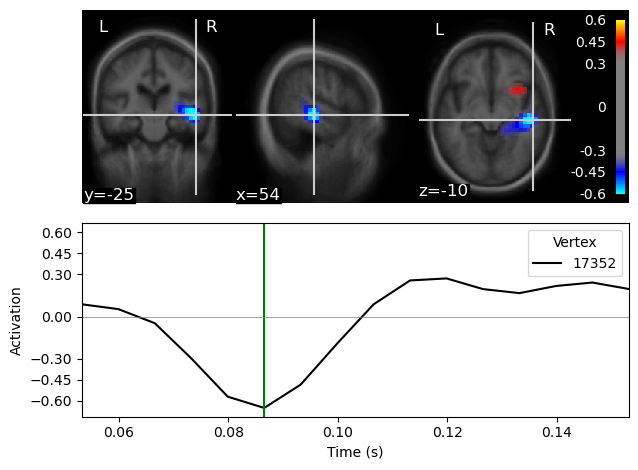

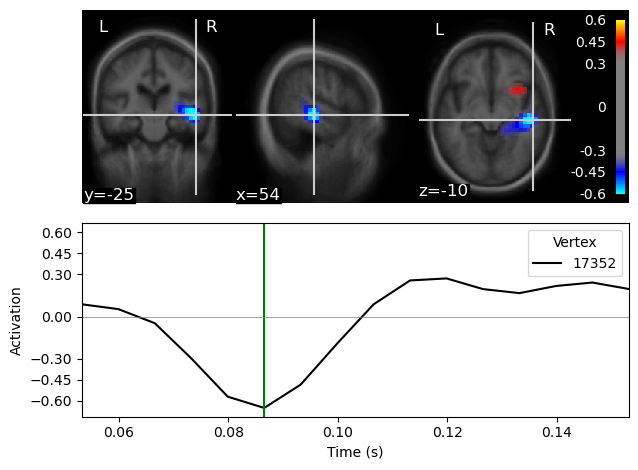

In [77]:
# morph the output to fasverage

fetch_fsaverage(subjects_dir)  # ensure fsaverage src exists
fname_fs_src = subjects_dir / 'fsaverage' / 'bem' / 'fsaverage-vol-5-src.fif'

src_fs = mne.read_source_spaces(fname_fs_src)
morph = mne.compute_source_morph(
    src, subject_from='sample', src_to=src_fs, subjects_dir=subjects_dir,
    niter_sdr=[5, 5, 2], niter_affine=[5, 5, 2], zooms=7,  # just for speed
    verbose=True)
stc_fs = morph.apply(stc)
del stc

stc_fs.plot(
    src=src_fs, mode='stat_map', initial_time=0.085, subjects_dir=subjects_dir,
    clim=dict(kind='value', pos_lims=lims), verbose=True)

In [78]:
del filters, filters_vec